In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics

# 1. Loading the dataset


# 2. Making Passenger-id the index column

In [2]:
df = pd.read_csv('c:/Users/Rosmin/Downloads/titanic_dataset.csv', index_col='PassengerId')
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 3. Checking the basic details of the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [4]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [5]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 4. Handling missing values

# a) Age

In [6]:
print('\nNumber of null values in age column: ', df['Age'].isnull().sum())



Number of null values in age column:  177


In [7]:
df['Age'].median()

28.0

In [8]:
df['median_age'] = df['Age'].fillna(df['Age'].median())
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,median_age
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0


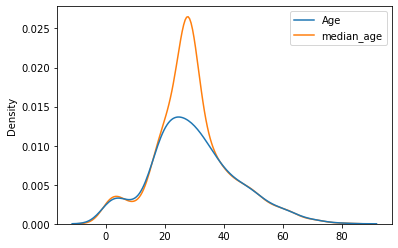

In [9]:
sns.kdeplot(data=df[['Age', 'median_age']])
plt.show()

In [10]:
random_age_values = df['Age'].dropna().sample(df['Age'].isnull().sum())
random_age_values.index = df[df['Age'].isnull()].index
df['random_age'] = df['Age'].fillna(random_age_values)

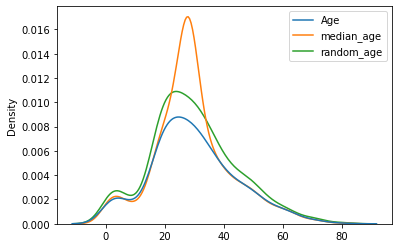

In [11]:
sns.kdeplot(data=df[['Age', 'median_age', 'random_age']])
plt.show()

In [12]:
df['Age'].fillna(random_age_values, inplace=True)

In [13]:
df['Age'].isnull().sum()


0

In [14]:
df.drop(columns=['median_age', 'random_age'], inplace=True)

In [15]:
df.head()


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# b) Embarked

In [16]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Embarked'].isnull().sum()


0

# c) Cabin

In [17]:
df['Cabin'].isnull().sum()

687

In [18]:
df['Cabin'].nunique()


147

In [19]:
df['Cabin'].fillna('N/A', inplace=True)


In [20]:
df['Cabin'].isnull().sum()

0

# 5. Handling Outliers

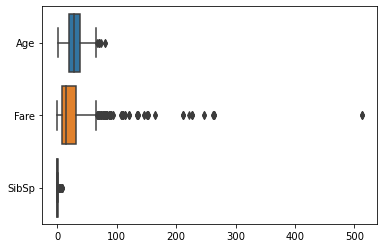

In [21]:
sns.boxplot(data=df[['Age', 'Fare', 'SibSp']], orient='h')
plt.show()

In [22]:
df_with_outliers = df.copy(deep=True)

In [23]:
def outlier_handling(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    q_limit = 1.5 * iqr
    upper_limit = q3 + q_limit
    lower_limt = q1 - q_limit
    outliers = data.loc[(data < lower_limt) ^ (data > upper_limit)].tolist()
    idx = data.loc[(data < lower_limt) ^ (data > upper_limit)].index.tolist()
    return outliers, idx

In [24]:
fare_outlier_list, fare_outlier_index = outlier_handling(df['Fare'])
age_outlier_list, age_outlier_index = outlier_handling(df['Age'])
sibsp_oulliers, sibsp_outlier_index = outlier_handling(df['SibSp'])

In [25]:
print(len(fare_outlier_index), len(age_outlier_index), len(sibsp_outlier_index))

116 12 46


In [26]:
new_idx = sibsp_outlier_index + age_outlier_index + fare_outlier_index
len(new_idx)

174

In [27]:
new_idx = set(new_idx)
new_idx

{2,
 8,
 17,
 25,
 28,
 32,
 34,
 35,
 51,
 53,
 60,
 62,
 63,
 64,
 69,
 72,
 73,
 86,
 89,
 97,
 103,
 108,
 117,
 119,
 120,
 121,
 125,
 140,
 152,
 160,
 165,
 172,
 177,
 181,
 183,
 196,
 202,
 216,
 219,
 225,
 230,
 231,
 234,
 246,
 257,
 258,
 259,
 262,
 263,
 267,
 269,
 270,
 276,
 279,
 291,
 292,
 298,
 300,
 306,
 307,
 308,
 311,
 312,
 319,
 320,
 325,
 326,
 333,
 335,
 337,
 338,
 342,
 367,
 370,
 374,
 375,
 376,
 378,
 381,
 386,
 387,
 391,
 394,
 410,
 413,
 436,
 439,
 446,
 454,
 481,
 485,
 486,
 487,
 494,
 497,
 499,
 505,
 506,
 521,
 528,
 538,
 541,
 542,
 543,
 545,
 551,
 558,
 559,
 569,
 582,
 586,
 588,
 592,
 610,
 628,
 631,
 635,
 642,
 643,
 646,
 656,
 660,
 661,
 666,
 673,
 680,
 682,
 684,
 687,
 690,
 699,
 701,
 709,
 717,
 727,
 731,
 738,
 742,
 743,
 746,
 760,
 764,
 766,
 779,
 780,
 788,
 790,
 793,
 794,
 803,
 814,
 820,
 821,
 825,
 830,
 836,
 847,
 850,
 851,
 852,
 857,
 864,
 880}

In [28]:
len(new_idx)

163

In [29]:
index_to_remove = list(new_idx)

In [30]:
len(index_to_remove)

163

In [31]:
df.drop(index=index_to_remove, inplace=True)

In [32]:
df.shape

(728, 11)

# 6. Min-max scaling

In [34]:
df.drop('Name',axis=1,inplace=True)
df.drop('Ticket',axis=1,inplace=True)

In [36]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,N/A,S
3,1,3,female,26.0,0,0,7.9250,N/A,S
4,1,1,female,35.0,1,0,53.1000,C123,S
5,0,3,male,35.0,0,0,8.0500,N/A,S
6,0,3,male,24.0,0,0,8.4583,N/A,Q


In [39]:
df=pd.get_dummies(df)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A10,Cabin_A14,...,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_N/A,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
3,1,3,26.0,0,0,7.9250,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,1,1,35.0,1,0,53.1000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0,3,35.0,0,0,8.0500,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
6,0,3,24.0,0,0,8.4583,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0


In [40]:
y=df['Survived']
x=df.drop('Survived',axis=1)

In [41]:
x.describe()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A10,Cabin_A14,Cabin_A16,...,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_N/A,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
count,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,...,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000
mean,2.461538,29.338255,0.278846,0.291209,17.151865,0.313187,0.686813,0.001374,0.001374,0.001374,...,0.004121,0.004121,0.001374,0.002747,0.005495,0.846154,0.001374,0.153846,0.094780,0.751374
std,0.738901,13.244328,0.509057,0.758504,13.412083,0.464109,0.464109,0.037062,0.037062,0.037062,...,0.064106,0.064106,0.037062,0.052378,0.073972,0.361049,0.037062,0.361049,0.293113,0.432514
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,21.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,3.000000,28.000000,0.000000,0.000000,11.500000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,3.000000,37.000000,0.250000,0.000000,25.926050,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,3.000000,65.000000,2.000000,6.000000,65.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [42]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)
lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)
predictions=model.predict(x_test)
print('MSE is : ',mean_squared_error(y_test,predictions))
print('r squared value is : ',r2_score(y_test,predictions))

MSE is :  3.985842980529826e+18
r squared value is :  -1.6975470324270483e+19
